# Mine The Model - Celesta 2023

"Mine the Model 2023" Kaggle musobaqasi asosan fond bozoridagi aktsiyalar
narxini bashorat qilishga qaratilgan. Bu turdagi musobaqalarda odatda ishtirokchilardan ma'lum vaqt oralig'ida aktsiyalar narxini taxmin qilishlari talab etiladi. Ular turli xil xususiyatlar (features) va tarixiy ma'lumotlardan foydalanib, bashorat qilish modeli yaratishlari kerak bo'ladi.

```Bu ishdan asosiy maqsad, bizdagi 50 ta datasetdan foydalanib har-biri uchun 100 kunlik taxminiy narxlarni bashorat(predict) qilishdan iborat```

Birinchi o'rinda bizga kerakli bo'lgan datasetni yuklab olamiz:

https://www.kaggle.com/competitions/mine-the-model-2023/overview

# *1. Open*

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c mine-the-model-2023

 83% 3.00M/3.63M [00:00<00:00, 22.3MB/s]
100% 3.63M/3.63M [00:00<00:00, 24.6MB/s]


Yuklab olgan faylimiz albatta .zip ko'rinishida bo'ladi, uni .zipdan ochib olamiz.

In [2]:
!unzip mine-the-model-2023.zip

Archive:  mine-the-model-2023.zip
  inflating: README.md               
  inflating: Upload-Dataset/TRAIN/003.csv  
  inflating: Upload-Dataset/TRAIN/064.csv  
  inflating: Upload-Dataset/TRAIN/070.csv  
  inflating: Upload-Dataset/TRAIN/088.csv  
  inflating: Upload-Dataset/TRAIN/135.csv  
  inflating: Upload-Dataset/TRAIN/143.csv  
  inflating: Upload-Dataset/TRAIN/168.csv  
  inflating: Upload-Dataset/TRAIN/169.csv  
  inflating: Upload-Dataset/TRAIN/213.csv  
  inflating: Upload-Dataset/TRAIN/226.csv  
  inflating: Upload-Dataset/TRAIN/228.csv  
  inflating: Upload-Dataset/TRAIN/230.csv  
  inflating: Upload-Dataset/TRAIN/234.csv  
  inflating: Upload-Dataset/TRAIN/274.csv  
  inflating: Upload-Dataset/TRAIN/319.csv  
  inflating: Upload-Dataset/TRAIN/355.csv  
  inflating: Upload-Dataset/TRAIN/367.csv  
  inflating: Upload-Dataset/TRAIN/374.csv  
  inflating: Upload-Dataset/TRAIN/376.csv  
  inflating: Upload-Dataset/TRAIN/387.csv  
  inflating: Upload-Dataset/TRAIN/390.csv  
  in

Shu faylni ichidagi jadvallarni o'qib olish va ko'rish uchun kerakli kutubxonalarni o'rnatib olamiz:

In [16]:
import pandas as pd
import numpy as np

df_003 = pd.read_csv('/content/Upload-Dataset/TRAIN/143.csv')
df_003

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2007-01-02,3.82,3.82,3.80,3.80,2.711421,1046,0.0,0.0
1,2007-01-03,3.82,3.82,3.80,3.82,2.725692,31765,0.0,0.0
2,2007-01-04,3.82,3.82,3.70,3.70,2.640068,110755,0.0,0.0
3,2007-01-05,3.80,3.85,3.80,3.85,2.747097,41376,0.0,0.0
4,2007-01-08,3.80,3.80,3.80,3.80,2.711421,7000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2995,2018-11-30,12.35,12.36,12.14,12.25,11.393190,302806,0.0,0.0
2996,2018-12-03,12.20,12.23,12.01,12.09,11.244383,207325,0.0,0.0
2997,2018-12-04,12.08,12.43,11.83,12.05,11.207180,261551,0.0,0.0
2998,2018-12-05,12.11,12.28,12.11,12.19,11.337387,234363,0.0,0.0


Bizni `TRAIN` papkamizni ichida nechta jadval(dataset) borligini ko'rib chiqamiz

In [17]:
import os

# Papkaning manzilini kiriting
path = "/content/Upload-Dataset/TRAIN"

# Papkadagi barcha fayllarni olish
files = os.listdir(path)

# Fayllarni list ko'rinishida chiqarish
print(files)

['577.csv', '653.csv', '592.csv', '367.csv', '484.csv', '542.csv', '436.csv', '665.csv', '274.csv', '804.csv', '355.csv', '958.csv', '319.csv', '405.csv', '473.csv', '168.csv', '376.csv', '143.csv', '914.csv', '387.csv', '213.csv', '552.csv', '875.csv', '234.csv', '374.csv', '228.csv', '559.csv', '528.csv', '416.csv', '064.csv', '558.csv', '003.csv', '390.csv', '169.csv', '230.csv', '614.csv', '702.csv', '662.csv', '645.csv', '433.csv', '546.csv', '135.csv', '791.csv', '226.csv', '640.csv', '495.csv', '088.csv', '859.csv', '070.csv', '445.csv']


jadvallar soni

In [18]:
len(files)

50

Endi bizda `TRAIN` papkamizni ichida 50 ta jadval(dataset)larimiz bor. Har bir jadval turli `kompaniya` yoki `aktsiyaga` tegishli bo'lishi mumkin.

Bizni ishimizni osonlashtirish uchun hamma 50 ta jadvallarni bir yerga yig'ib(qo'shib) olamiz.

Bunda bizdagi hamma jadvallarni ustunlari va qatorlari bir-xil !

In [19]:
# Asosiy DataFrame (bo'sh DataFrame)
df_all = pd.DataFrame()

# Barcha fayllarni yuklab, asosiy DataFrame'ga birlashtirish
for file in files:
    file_path = f'/content/Upload-Dataset/TRAIN/{file}'  # Fayl yo'lini o'zgartirish
    df_temp = pd.read_csv(file_path)
    df_all = pd.concat([df_all, df_temp], ignore_index=True)

# Natijani ko'rsatish
df_all

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2007-01-02,1009.000000,1016.000000,1004.000000,1012.000000,628.271851,6627661,0.0,0.0
1,2007-01-03,1014.500000,1016.500000,1008.500000,1016.500000,631.065491,9084448,0.0,0.0
2,2007-01-04,1012.500000,1027.000000,1009.000000,1009.500000,626.719788,13315229,0.0,0.0
3,2007-01-05,1003.500000,1005.000000,993.500000,996.000000,618.338684,14392949,0.0,0.0
4,2007-01-08,996.000000,1000.000000,987.500000,990.000000,614.613770,7863453,0.0,0.0
...,...,...,...,...,...,...,...,...,...
149995,2018-11-30,67.400002,67.800003,61.000000,62.650002,60.361557,2043634,0.0,0.0
149996,2018-12-03,63.000000,63.799999,60.599998,62.200001,59.927998,684073,0.0,0.0
149997,2018-12-04,61.500000,62.250000,60.299999,61.450001,59.205391,344866,0.0,0.0
149998,2018-12-05,60.250000,62.549999,59.450001,60.900002,58.675488,429417,0.0,0.0


# 2. *Graph*

Endi biz shu umumlashtirgan datasetimizni grafik ko'rinishda ham ko'rib yaxshiroq tushunishga harakat qilamiz:

In [20]:
import matplotlib.pyplot as plt

Biz vaqt bo'yicha o'zgargan narxlarni grafik ko'rinishda ko'ramiz:

Bunda biz `Date` va `Open`, `Date` va `Close` ustunlarini bi-biri bilan bog'liqlik grafikni ko'rsak, ular nisbatan o'xshash ekanligini payqaymiz.

Bu degani, vaqt o'zgarishi bizni narxlarimizda ochilishi va yopilishidagi narxlariga unchalik ta'sir qilmasligini ko'rishimiz mumkin.

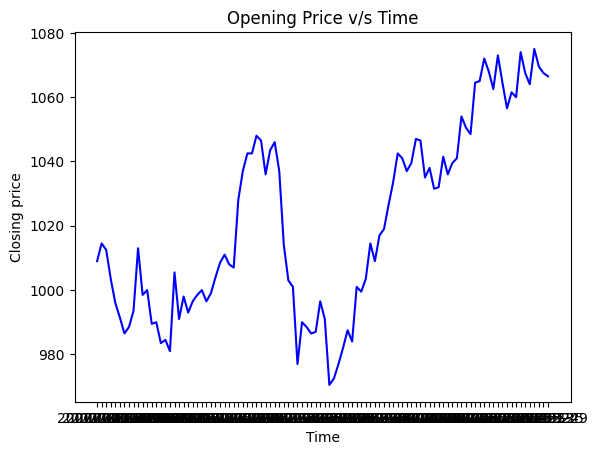

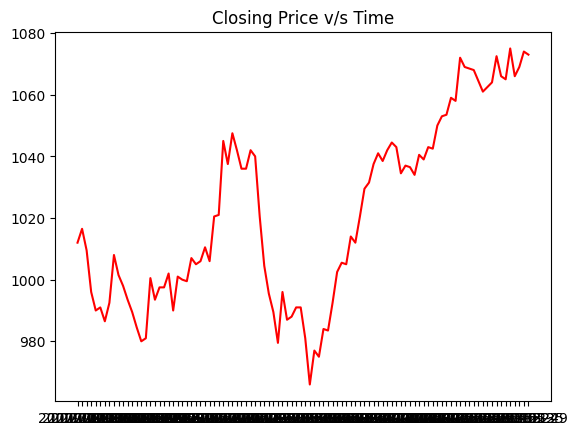

In [21]:
# Create two figures
fig1 = plt.figure()
fig2 = plt.figure()

# Create plots on each figure
ax1 = fig1.add_subplot(111)
ax1.plot(df_all['Date'][0:100],df_all['Open'][0:100], c='b', label='Opening Price v/s Time')
ax1.set_title('Opening Price v/s Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Opening Price')

ax2 = fig2.add_subplot(111)
ax2.plot(df_all['Date'][0:100],df_all['Close'][0:100], c='r', label='Closing Price v/s Time')
ax2.set_title('Closing Price v/s Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Closing price')

# Show the plots
plt.show()


# *3. Model building...*

Eng asosiy nuqtaga ham yetib keldik. Bu yerda biz yig'ligan malumotlar asosida aksiyalar narxini yuqori aniqlik bilan taxmin(predict) qilish kerak.

Kerakli kutubxonalarni yuklab olamiz

Biz sklearn kutubxonasidagi `LinearRegression` modelidan foydalanamiz.

Bu dasetimiz uchun shu maqbul tanlov hisoblanadi.Ya'ni chiziqli o'sish yoki kamayish ko'rinishida bo'ladi.

In [22]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime
import os

Modelni saqlab olish, keyin shu asosida ish ko'riladi

In [23]:
model=LinearRegression()

`Date` ustunini stringdan vaqt ko'rinishiga o'tkazish

'2023-01-01' sanasi UNIX vaqt tamg‘asi bo‘yicha 1672531200 ga teng.

'2023-02-15' sanasi UNIX vaqt tamg‘asi bo‘yicha 1676419200 ga teng.

'2023-03-20' sanasi UNIX vaqt tamg‘asi bo‘yicha 1679270400 ga teng.

In [24]:
# Sanalarni datetime formatiga o'tkazish
date_int=[]
for date in df_all['Date']:
      date_obj=datetime.datetime.strptime(date,"%Y-%m-%d")
      unix_timestamp=int(date_obj.timestamp())
      date_int.append(unix_timestamp)

df_all['Date']=date_int

bunda biz Bashorat qilish kerak bo'lgan ustunni ajratib olamiz va shunga qarab natijalarni baholaymiz

In [25]:
#Separating features and labels from the dataframe
features=df_all.drop('Close',axis=1)
label=df_all.pop('Close')

shu jadval ustunlari haqida malumot

In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          150000 non-null  int64  
 1   Open          150000 non-null  float64
 2   High          150000 non-null  float64
 3   Low           150000 non-null  float64
 4   Adj Close     150000 non-null  float64
 5   Volume        150000 non-null  int64  
 6   Dividends     150000 non-null  float64
 7   Stock Splits  150000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 9.2 MB


Malumotlarimizni `features` va `label` jadvallarini ```train``` va ```test```setlarga ajratish.

`test_size=100`: Bu parametr test to'plami hajmini belgilaydi. Bu holda test to'plami 100 ta namunadan iborat bo'ladi.

`shuffle=False`: Bu parametr ma'lumotlarni ajratishdan oldin aralashtirmaslikni belgilaydi. Ya'ni, ma'lumotlar ketma-ketligicha ajratiladi.

In [29]:
#splitting the train and test data
X_train,X_test,Y_train,Y_test = train_test_split(features,label, test_size=100 ,shuffle=False)

Boshida biz yozgan `model` ni o'qitish

In [30]:
# training it on the train data
model.fit(X_train,Y_train)

LinearRegression()

Keyingi 100 kun uchun yopilish narxini bashorat qilish

In [31]:
# Predicting closing price for next 100 days
Y_pred = model.predict(X_test)

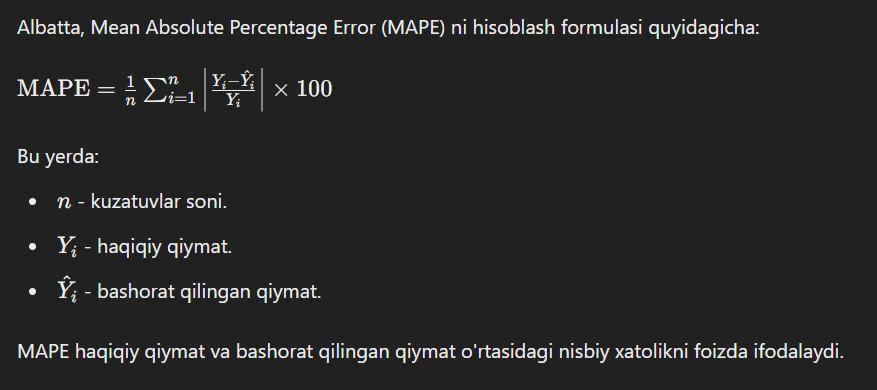

In [34]:
#calculating mean absolute percentage error using sklearn metrics
mape=mean_absolute_percentage_error(Y_test,Y_pred)
mape

0.013648364676967305

1. Narxlar va identifikatorlardan foydalangan holda csv yuborish uchun kerakli prognoz ma'lumotlar ramkasini yaratish.

2. Ya'ni, bizni asosiy qiymatlarimiz 50 ta datasetimizni har-biri uchun 100 kunlik bashorat qilinib yig'ilgan natija !

In [35]:
#making the required prediction dataframe for submission csv using prices and ids
ids=[]
for index, value in enumerate(Y_pred):
  ID = f"{os.path.splitext(os.path.basename(path))[0]}_#{index+1}"
  ids.append(ID)

pred_df=pd.DataFrame({'ID':ids,'Price':Y_pred})

# return pred_df,mape

In [36]:
pred_df

,ID,Price
0,TRAIN_#1,43.612068
1,TRAIN_#2,43.709622
2,TRAIN_#3,43.080541
3,TRAIN_#4,41.793825
4,TRAIN_#5,43.077561
...,...,...
95,TRAIN_#96,62.279566
96,TRAIN_#97,61.218051
97,TRAIN_#98,60.581568
98,TRAIN_#99,60.893892


Endi hamma datasetlarga qo'llash uchun `predictor_linear()` funksiyasini yaratib olamiz va biz tepadaroqda ko'rgan ishlarimizni solib qo'yamiz.

Bu funksiya bizga `pred_df` - asosiy natija, `mape` - model qanchaliik xatolik bilan ishlayotgan qiymatni qaytaradi.

In [39]:
# Creating a function which is based on the model pipeline stated above and here we will use the sklearn Linear Regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import datetime
import os

model=LinearRegression()

def predictor_linear(path):

    # Read the CSV file
    df = pd.read_csv(path)

    #The dates in the dataset are in string format. A linear regression model does not expect string values. Thus we need to convert these dates to integer, therefore onverting them to unix timestamp
    date_int=[]
    for date in df['Date']:
      date_obj=datetime.datetime.strptime(date,"%Y-%m-%d")
      unix_timestamp=int(date_obj.timestamp())
      date_int.append(unix_timestamp)

    df['Date']=date_int

    #Separating features and labels from the dataframe
    features=df.drop('Close',axis=1)
    label=df.pop('Close')

    #splitting the train and test data
    X_train,X_test,Y_train,Y_test = train_test_split(features,label, test_size=100 ,shuffle=False)

    # training it on the train data
    model.fit(X_train,Y_train)

    # Predicting closing price for next 100 days
    Y_pred = model.predict(X_test)

    #calculating mean absolute percentage error using sklearn metrics
    mape=mean_absolute_percentage_error(Y_test,Y_pred)

    #making the required prediction dataframe for submission csv using prices and ids
    ids=[]
    for index, value in enumerate(Y_pred):
      ID = f"{os.path.splitext(os.path.basename(path))[0]}_#{index+1}"
      ids.append(ID)

    pred_df=pd.DataFrame({'ID':ids,'Price':Y_pred})

    return pred_df,mape

Tepada yaratgan funksiyaga datasetlarni jo'natamiz:

In [41]:
# CSV fayllar saqlanadigan papka yo'lini belgilash
folder_path = "/content/Upload-Dataset/TRAIN"
dfs=[] # DataFrames-ni keyinchalik bitta yuborish faylida birlashtirish uchun -->
   # --> taxmin qilingan qiymatlar bilan saqlash uchun bo'sh ro'yxat yaratib olamiz.

mapes=[]#Barcha aktsiyalarning MAPE-ni saqlash uchun bo'sh ro'yxat yaratish
# Har bir aksiya uchun narxlarni yaratish uchun har bir CSV faylini belgilangan funktsiyada o'tkazish
for filename in os.listdir(folder_path):
    stock_df = os.path.join(folder_path,filename)#folder_path va filename o'zgaruvchilarini birlashtirib, to'liq fayl yo'lini hosil qiladi.
    price,mape=predictor_linear(stock_df)
    dfs.append(price)
    mapes.append(mape)


Mean of all MAPE values of stocks

In [44]:
print(sum(mapes)/len(mapes))


0.0065810319269195925


In [45]:
# Concatenating the predicted data into one CSV file and saving it
dfsconcat = pd.concat(dfs)
dfsconcat.columns = ['ID','Price']

Biz bashorat qilgan narx natijamizni boshidan 100 ta qatorni grafik ko'rinishida ko'rib chiqamiz

Text(0, 0.5, 'Closing Price')

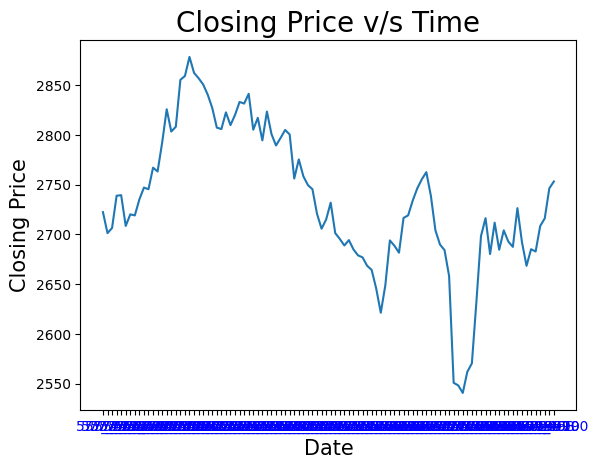

In [48]:
plt.plot(dfsconcat['ID'][0:100],dfsconcat['Price'][0:100])
plt.title('Closing Price v/s Time',size=20)
plt.xticks(c='blue')
plt.xlabel('Date',size=15,)
plt.ylabel('Closing Price',size=15)

Jadvalga ko'z tashlash

In [49]:
dfsconcat

,ID,Price
0,577_#1,2722.487745
1,577_#2,2701.324592
2,577_#3,2706.530381
3,577_#4,2738.974474
4,577_#5,2739.542052
...,...,...
95,445_#96,64.042318
96,445_#97,60.543288
97,445_#98,59.251728
98,445_#99,59.370414


# Modelni saqlash

In [50]:
dfsconcat.to_csv('Submission.csv',index=False)